# Patients treated in Emergency according to Age and Sex - HNAL

Presented by: [Samuel D. Boadi](https://bit.ly/Tableau_SDBoadi)

#### Dataset Info
This dataset records patients who entered the emergency service between February and March 2023 and were referred to various clinics.<br> 

The data includes information about the patient's admission, discharge, treatment establishment, cut-off date, sex, age, and geographic location.<br>

The dataset is located in the Department of Lima, Province of Lima, District of Lima with Ubigeo 150101.<br> 

The data aims to improve transparency and openness of data for the Arzobispo Loayza National Hospital.

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from deep_translator import GoogleTranslator
from wordcloud import WordCloud

%matplotlib inline

In [2]:
# Load data. 
df = pd.read_csv('data/patient_data_en.csv')
female_df = df[df['SEX'] == 'FEMALE']
male_df = df[df['SEX'] == 'MALE']

# function to plot data
def hist_plot(data=df, sex=''):
    bins = np.arange(0, data['AGE'].max()+2, 2)
    plt.hist(data = data, x = 'AGE', bins=bins)
    plt.xlabel('Age')
    plt.ylabel('No. of patients')
    plt.title('{} Age Distribution'.format(sex))
    if sex != '':
        plt.ylim((0, 220))

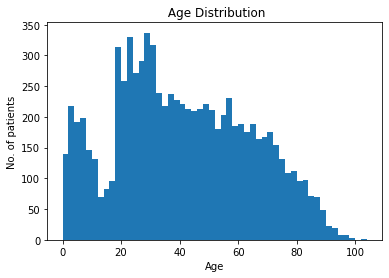

In [3]:
hist_plot(df)

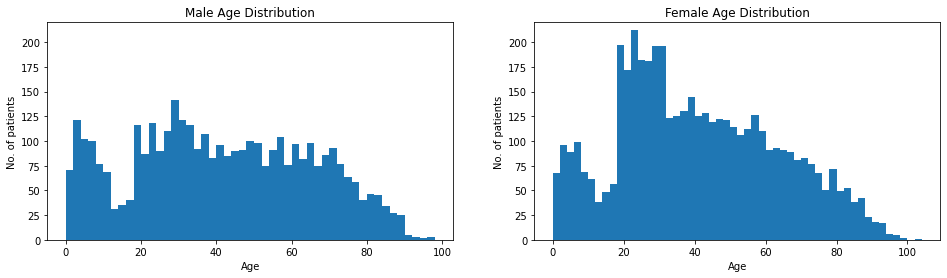

In [4]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
hist_plot(male_df, 'Male')

plt.subplot(1, 2, 2)
hist_plot(female_df, 'Female')
         
plt.subplots_adjust(wspace=0.2, hspace=1)

The youngest patient was 1 year old and the oldest was 103.<br> 
The average age of patients admitted to the hospital was 40.<br>

Patients between 1 and 10 years old visited the hospital similar to the 40 years old patients.<br>
There was a drop in admissions between 10 and 20 years old.<br> 
Patients aged 20 to 30 had the highest number of admissions, especially females.<br> 
This was clear in the female age distribution but less clear in the male age distribution.<br>

Admissions for patients over 30 declined steadily.<br> 
There was a sharp decline for females, but the male age distribution showed a decline with some spikes along the way.

Female 4714 
Male 3693


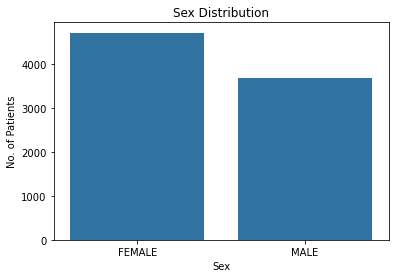

In [5]:
blue_color = sb.color_palette()[0]
col_order = df['SEX'].value_counts().index
sb.countplot(data=df, x='SEX', color=blue_color, order=col_order)
plt.title('Sex Distribution')
plt.ylabel('No. of Patients')
plt.xlabel('Sex');

print('Female {} \nMale {}' .format(df['SEX'].value_counts()[0], df['SEX'].value_counts()[1]))

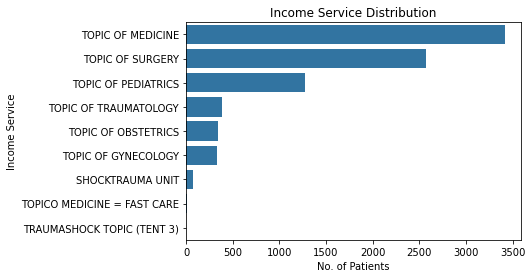

In [6]:
col_order = df['INCOME SERVICE'].value_counts().index
sb.countplot(data=df, y='INCOME SERVICE', color=blue_color, order=col_order)
plt.title('Income Service Distribution')
plt.xlabel('No. of Patients')
plt.ylabel('Income Service');

Females outnumbered males in the hospital 1021 to 1.<br> 
This is because 99% of patients seeking Obstetrics and Gynecology care were female.<br> 
There were also 400 more female than male patients in the Medicine department.<br> 
Further investigation is needed to determine the reason for this disparity.<br> 
The other Income Services had similar numbers of patients for both sexes.

Medicine was the topic with the most patient admissions, followed by Surgery.

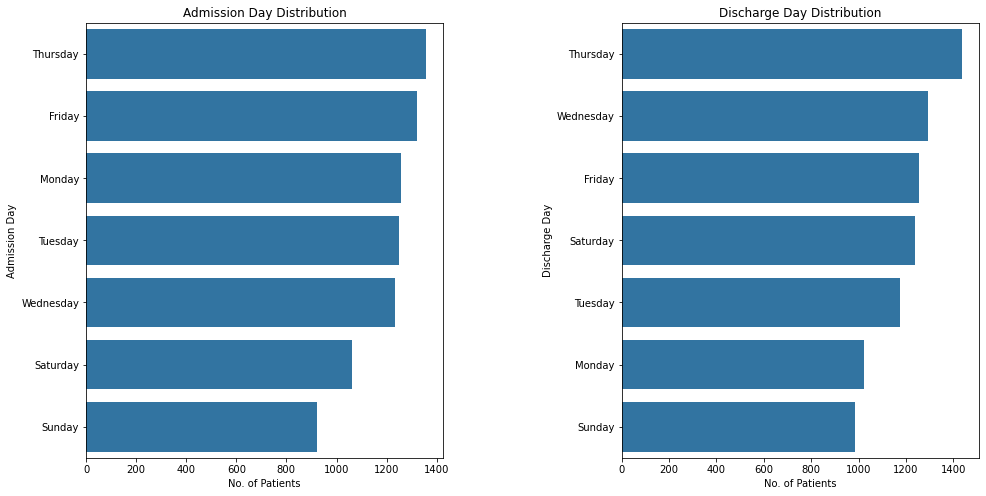

In [7]:
# columns to plot
cols = ['ADMISSION DAY', 'DISCHARGE DAY']

# plot bar(h) chart of columns in 'cols'
plt.figure(figsize=(16, 8))
a=0

for col in cols:
    a +=1
    plt.subplot(1, 2, a)
    col_order = df[col].value_counts().index
    sb.countplot(data=df, y=col, color=blue_color, order=col_order)
    plt.title('{} Distribution'.format(col.title()))
    plt.xlabel('No. of Patients')
    plt.ylabel(col.title());
plt.subplots_adjust(wspace=0.5, hspace=0.5)

Thursdays had the highest number of both patient admissions and discharges, while Sundays had the lowest.<br> 
The other days of the week ranked differently for admissions and discharges.

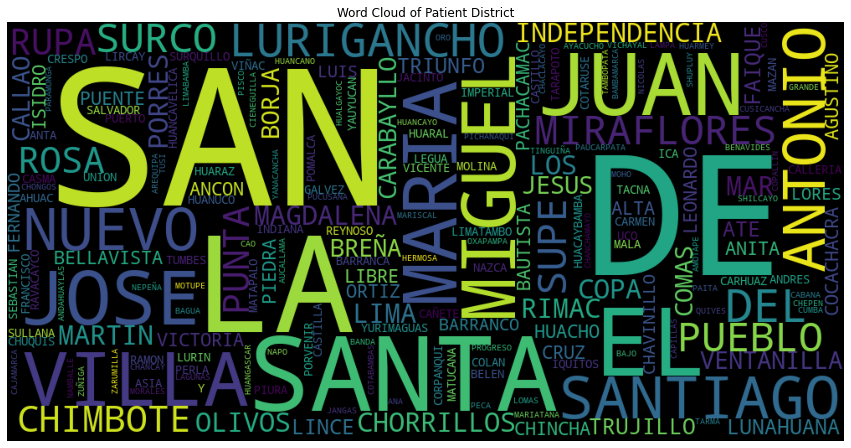

In [8]:
unique_string=(' ').join(df['PATIENT DISTRICT'].unique())
wordcloud = WordCloud(width=1000, height=500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.title('Word Cloud of Patient District')
plt.axis('off')
plt.imshow(wordcloud);

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Patient_Data_Slides.ipynb --to slides --post serve --no-input --no-prompt